In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"ML Simple Linear Regression Resource16931312390.csv")

In [3]:
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


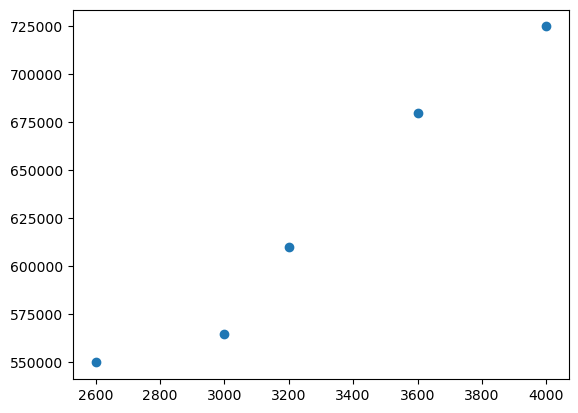

In [4]:
plt.scatter(data["area"],data["price"]);

In [5]:
model=LinearRegression()

In [6]:
model.fit(data[["area"]],data["price"])

LinearRegression()

In [7]:
model.predict([[2600],[2800]])

array([533664.38356164, 560821.91780822])

In [8]:
model.predict(data[["area"]])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

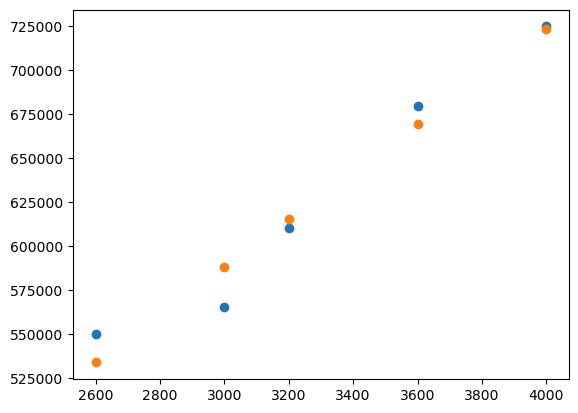

In [9]:
plt.scatter(data["area"],data["price"]);
plt.scatter(data["area"],model.predict(data[["area"]]));

In [53]:
model.score(data[["area"]],data[["price"]])

0.9584301138199486

In [34]:
r2_score(data["price"],model.predict(data[["area"]]))*100

95.84301138199486

In [36]:
mean_absolute_error(data["price"],model.predict(data[["area"]]))

11246.57534246575

In [38]:
mean_squared_error(data["price"],model.predict(data[["area"]]))**(1/2)

13668.030893042014

In [42]:
np.sqrt(mean_squared_error(data["price"],model.predict(data[["area"]])))

13668.030893042014

In [10]:
data.loc[0]["price"]-model.predict([[data["area"][0]]])

array([16335.61643836])

In [66]:
data["predict"]=model.predict(data[["area"]])

In [67]:
data

,area,price,predict
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


In [71]:
model1=Lasso(800000)

In [72]:
model1.fit(data[["area"]],data["price"])

Lasso(alpha=800000)

In [73]:
model1.predict(data[["area"]])

array([535993.15068493, 588938.35616438, 615410.95890411, 668356.16438356,
       721301.36986301])

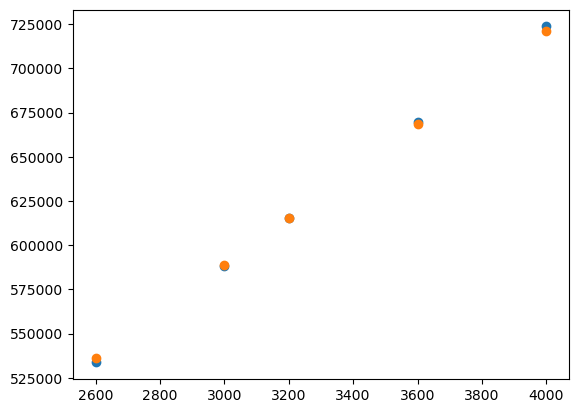

In [74]:
plt.scatter(data["area"],data["predict"]);
plt.scatter(data["area"],model1.predict(data[["area"]]));

In [78]:
data

,area,price,predict
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


In [75]:
model.intercept_

180616.43835616432

In [76]:
model.coef_

array([135.78767123])

In [77]:
135.78767123*3000+180616.43835616432

587979.4520461643

In [11]:
data1=pd.read_csv(r"ML Multiple Linear Regression Resource16931320110.csv")

In [82]:
data1

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [87]:
data1.columns

Index(['Mileage', 'Age(yrs)', 'Sell Price($)'], dtype='object')

In [12]:
x=data1.drop("Sell Price($)",axis=1)

In [13]:
y=data1["Sell Price($)"]

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
model.predict([[30000,2],[77000,4]])

array([36368.7086868 , 19762.93631182])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=40)

In [19]:
x_train.shape

(16, 2)

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.predict(x_test)

array([22450.66131579, 28013.31065216, 24965.37752014, 30017.86805945])

In [22]:
model.score(x_train,y_train)

0.9373700317267083

In [23]:
model.score(x_test,y_test)

0.8098116200346479

In [24]:
model.coef_

array([ -0.39534355, 367.50387878])

In [26]:
data2=pd.read_csv(r"Feature Encoding Resource17121427930.csv")

In [33]:
data2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
enc=LabelEncoder()

In [29]:
enc.fit(data2["workclass"])

LabelEncoder()

In [34]:
data2["encoded_workclass"]=enc.transform(data2["workclass"])

In [35]:
data2["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [36]:
data2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,4
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,4
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,4
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,4
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,4


In [37]:
enc.inverse_transform(data2["encoded_workclass"])

array(['Private', 'Private', 'Local-gov', ..., 'Private', 'Private',
       'Self-emp-inc'], dtype=object)

In [38]:
enc.inverse_transform([0])

array(['?'], dtype=object)

In [39]:
enc.transform(["Private"])

array([4])

In [40]:
df1=pd.get_dummies(data2["workclass"]).astype(int)

In [41]:
pd.concat([data2,df1],axis=1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,encoded_workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,4,0,0,0,0,1,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,4,0,0,0,0,1,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,2,0,0,1,0,0,0,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,4,0,0,0,0,1,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,4,0,0,0,0,1,0,0,0,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,4,0,0,0,0,1,0,0,0,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,4,0,0,0,0,1,0,0,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,4,0,0,0,0,1,0,0,0,0


In [42]:
df1

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0
48838,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,1,0,0,0,0


In [43]:
pd.from_dummies(df1)

,
0,Private
1,Private
2,Local-gov
3,Private
4,?
...,...
48837,Private
48838,Private
48839,Private
48840,Private


In [44]:
df1.idxmax(axis=1)

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Length: 48842, dtype: object

In [45]:
df1

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0
48838,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,1,0,0,0,0


In [46]:
data2["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# data["income"].map({'<=50k':0,'>=50k':1})

In [47]:
data2.replace(['<=50K', '>50K'],[0,1])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,4
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,4
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,4
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,4
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,4
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,4
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,4


In [48]:
data2.replace(['A-Za-z<>='],"",regex=True)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,4
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,4
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,4
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,4
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,4


In [50]:
data.replace[0,1](['<=50k','>=50k'])

TypeError: 'method' object is not subscriptable

In [52]:
data3=pd.read_csv(r"ML SVM Resource 16936477690.csv")

In [53]:
data3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
model=SVC(C=1000,kernel="poly")

In [55]:
x=data3.drop("target",axis=1)
y=data3["target"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [57]:
model.fit(x_train,y_train)

SVC(C=1000, kernel='poly')

In [48]:
model.score(x_train,y_train)

1.0

In [49]:
model.score(x_test,y_test)

0.7377049180327869

In [50]:
sc=MinMaxScaler()

In [51]:
x_train=sc.fit_transform(x_train)

In [52]:
x_test=sc.transform(x_test)

In [57]:
confusion_matrix(y_test,model.predict(x_test))

array([[28,  7],
       [ 9, 17]], dtype=int64)

<Axes: >

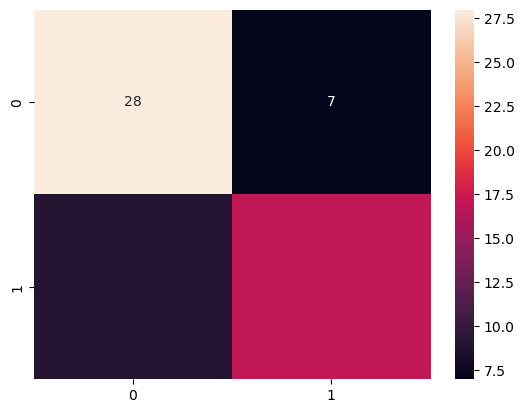

In [58]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

In [60]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.71      0.65      0.68        26

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

